In [1]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in c:\users\dell\anaconda3\lib\site-packages (1.1.0)


In [4]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)

import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

tf.enable_eager_execution()

In [6]:
datasets, metadata = tfds.load('fashion_mnist', as_supervised = True, with_info = True)
train_dataset, test_dataset = datasets['train'], datasets['test']

W0727 12:32:49.607026  7800 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [7]:
class_names = ['t-shirts/tops', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boots']

In [9]:
num_train_examples = metadata.splits['train'].num_examples
num_test_exaples = metadata.splits['test'].num_examples
print('Number of training examples: {}'.format(num_train_examples))
print('Number of testing examples: {}'.format(num_test_exaples))

Number of training examples: 60000
Number of testing examples: 10000


In [12]:
def normalize(images, labels):
    images = tf.cast(images,tf.float32)
    images/=255
    return images,labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [13]:
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28,28))


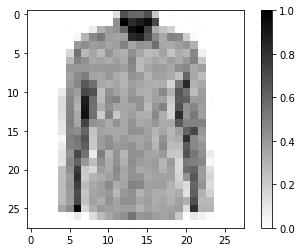

In [24]:
plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

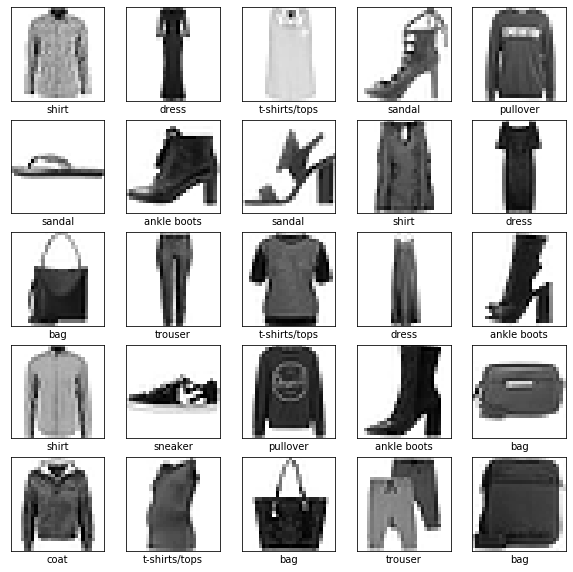

In [28]:
plt.figure(figsize = (10,10))
i = 0
for image, label in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap = plt.cm.binary)
    plt.xlabel(class_names[label])
    i+=1
plt.show()    

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28,1)),
    tf.keras.layers.Dense(128,activation = tf.nn.relu),
    tf.keras.layers.Dense(10,activation = tf.nn.softmax)
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [55]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [56]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
model.fit(train_dataset, epochs = 5, steps_per_epoch = math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5


In [41]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_exaples/32))

313/313 [==============================] - ETA: 10s - loss: 0.3466 - acc: 0.90 - ETA: 11s - loss: 0.3205 - acc: 0.85 - ETA: 5s - loss: 0.3459 - acc: 0.8750 - ETA: 5s - loss: 0.3262 - acc: 0.879 - ETA: 4s - loss: 0.3124 - acc: 0.881 - ETA: 4s - loss: 0.3159 - acc: 0.884 - ETA: 4s - loss: 0.3452 - acc: 0.870 - ETA: 3s - loss: 0.3510 - acc: 0.866 - ETA: 3s - loss: 0.3334 - acc: 0.876 - ETA: 3s - loss: 0.3421 - acc: 0.878 - ETA: 3s - loss: 0.3553 - acc: 0.874 - ETA: 2s - loss: 0.3626 - acc: 0.873 - ETA: 2s - loss: 0.3545 - acc: 0.877 - ETA: 2s - loss: 0.3553 - acc: 0.875 - ETA: 2s - loss: 0.3507 - acc: 0.877 - ETA: 2s - loss: 0.3515 - acc: 0.876 - ETA: 2s - loss: 0.3491 - acc: 0.875 - ETA: 2s - loss: 0.3472 - acc: 0.874 - ETA: 2s - loss: 0.3508 - acc: 0.875 - ETA: 2s - loss: 0.3509 - acc: 0.874 - ETA: 2s - loss: 0.3465 - acc: 0.874 - ETA: 2s - loss: 0.3492 - acc: 0.874 - ETA: 2s - loss: 0.3516 - acc: 0.873 - ETA: 1s - loss: 0.3538 - acc: 0.870 - ETA: 1s - loss: 0.3511 - acc: 0.870 - ETA: 1

In [42]:
print("Test accuracy", test_accuracy)
print("Test loss", test_loss)

Test accuracy 0.877
Test accuracy 0.35032044865262396


In [43]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

In [44]:
predictions.shape

(32, 10)

In [47]:
np.argmax(predictions[0])

6

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')